# Predicting Online Shoppers Behaviors

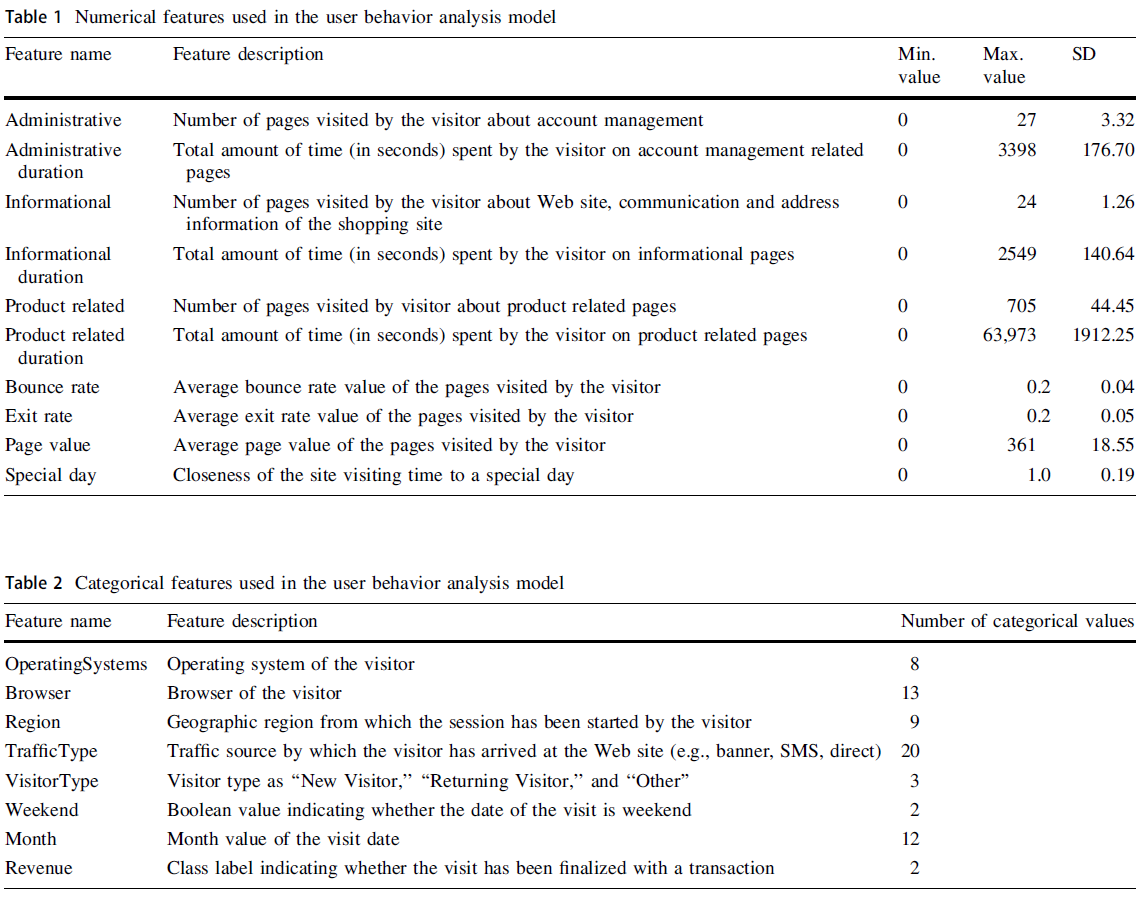

# Loading Libraries

In [1]:
# Load Python libraries for visualizing data.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = """D:/data/projects/mandy/gcp-keys/mcchao-main_nodal-keyword-466719-p5-b8f42a10ecf6.json"""

In [4]:
# Data is stored on and retrieved from BigQuery on Google Cloud Platform.
project_id = "nodal-keyword-466719-p5"
dataset_id = "main"
table_id = "online_shoppers_intention"

# Construct the query
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_id}.{table_id}`
"""
from google.cloud import bigquery
online_df = bigquery.Client().query(query).to_dataframe()
online_df.head()

Administrative  Administrative_Duration  Informational  \
0               1                      0.0              0   
1               2                      2.0              0   
2               0                      0.0              1   
3               1                      0.0              0   
4               1                      0.0              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               0                      0.0   
1                     0.0               0                      0.0   
2                     0.0               0                      0.0   
3                     0.0               0                      0.0   
4                     0.0               0                      0.0   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0          0.2        0.2         0.0         0.0   Feb                 1   
1          0.1        0.1         0.0         0.0   May                 1   
2          0.2        0.2         0.0         1.0   May                 1   
3          0.2        0.2         0.0         0.0   May                 1   
4          0.2        0.2         0.0         0.0   May                 1   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        2       1            5  Returning_Visitor     True    False  
1        1       3            2  Returning_Visitor     True    False  
2        1       3            3  Returning_Visitor     True    False  
3        1       1            2  Returning_Visitor    False    False  
4        1       6            2  Returning_Visitor    False    False

# Data Inspection

In [5]:
# Display the shape of the dataset.
online_df.shape

(12330, 18)

In [6]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  Int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  Int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  Int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  Int64  
 12  Browser                  12330 non-null  Int64  
 13  Region                   12330 non-null  Int64  
 14  TrafficType           

In [8]:
# Display na or nan values.
online_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Display descriptive statistics.
online_df.describe(include='all').transpose()

count unique                top   freq        mean  \
Administrative           12330.0   <NA>               <NA>   <NA>    2.315166   
Administrative_Duration  12330.0    NaN                NaN    NaN   80.818611   
Informational            12330.0   <NA>               <NA>   <NA>    0.503569   
Informational_Duration   12330.0    NaN                NaN    NaN   34.472398   
ProductRelated           12330.0   <NA>               <NA>   <NA>   31.731468   
ProductRelated_Duration  12330.0    NaN                NaN    NaN  1194.74622   
BounceRates              12330.0    NaN                NaN    NaN    0.022191   
ExitRates                12330.0    NaN                NaN    NaN    0.043073   
PageValues               12330.0    NaN                NaN    NaN    5.889258   
SpecialDay               12330.0    NaN                NaN    NaN    0.061427   
Month                      12330     10                May   3364         NaN   
OperatingSystems         12330.0   <NA>               <NA>   <NA>    2.124006   
Browser                  12330.0   <NA>               <NA>   <NA>    2.357097   
Region                   12330.0   <NA>               <NA>   <NA>    3.147364   
TrafficType              12330.0   <NA>               <NA>   <NA>    4.069586   
VisitorType                12330      3  Returning_Visitor  10551         NaN   
Weekend                    12330      2              False   9462         NaN   
Revenue                    12330      2              False  10422         NaN   

                                 std  min       25%         50%          75%  \
Administrative              3.321784  0.0       0.0         1.0          4.0   
Administrative_Duration   176.779107  0.0       0.0         7.5     93.25625   
Informational               1.270156  0.0       0.0         0.0          0.0   
Informational_Duration    140.749294  0.0       0.0         0.0          0.0   
ProductRelated             44.475503  0.0       7.0        18.0         38.0   
ProductRelated_Duration  1913.669288  0.0  184.1375  598.936905  1464.157214   
BounceRates                 0.048488  0.0       0.0    0.003112     0.016813   
ExitRates                   0.048597  0.0  0.014286    0.025156         0.05   
PageValues                 18.568437  0.0       0.0         0.0          0.0   
SpecialDay                  0.198917  0.0       0.0         0.0          0.0   
Month                            NaN  NaN       NaN         NaN          NaN   
OperatingSystems            0.911325  1.0       2.0         2.0          3.0   
Browser                     1.717277  1.0       2.0         2.0          2.0   
Region                      2.401591  1.0       1.0         3.0          4.0   
TrafficType                 4.025169  1.0       2.0         2.0          4.0   
VisitorType                      NaN  NaN       NaN         NaN          NaN   
Weekend                          NaN  NaN       NaN         NaN          NaN   
Revenue                          NaN  NaN       NaN         NaN          NaN   

                                 max  
Administrative                  27.0  
Administrative_Duration      3398.75  
Informational                   24.0  
Informational_Duration      2549.375  
ProductRelated                 705.0  
ProductRelated_Duration  63973.52223  
BounceRates                      0.2  
ExitRates                        0.2  
PageValues                361.763742  
SpecialDay                       1.0  
Month                            NaN  
OperatingSystems                 8.0  
Browser                         13.0  
Region                           9.0  
TrafficType                     20.0  
VisitorType                      NaN  
Weekend                          NaN  
Revenue                          NaN

In [10]:
# Manipulate the column datatypes.  
online_df['OperatingSystems'] = online_df['OperatingSystems'].astype('str')
online_df['Browser'] = online_df['Browser'].astype('str')
online_df['Region'] = online_df['Region'].astype('str')
online_df['TrafficType'] = online_df['TrafficType'].astype('str')

# Convert dtype from boolean to string.
online_df['Weekend'] = online_df['Weekend'].astype('str')
online_df['Revenue'] = online_df['Revenue'].astype('str')

In [11]:
# Verifying the data types changed.
online_df.dtypes

Administrative               Int64
Administrative_Duration    float64
Informational                Int64
Informational_Duration     float64
ProductRelated               Int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                     object
dtype: object

# Target Variable Analysis

In [12]:
# Display value count of target variable.
online_df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [13]:
# Percent breakdown of the Revenue rates.
online_rate = online_df['Revenue'].value_counts()/online_df.shape[0]
print(online_rate)

Revenue
False    0.845255
True     0.154745
Name: count, dtype: float64


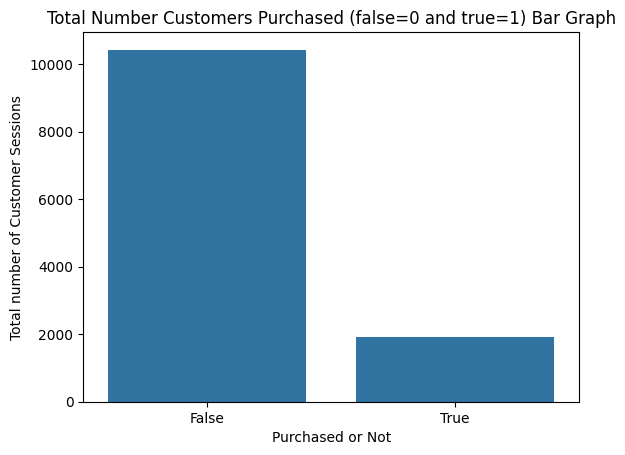

In [15]:
# Create bar graph of the Revenue.
sns.countplot(x='Revenue', data = online_df)
plt.xlabel('Purchased or Not')
plt.ylabel('Total number of Customer Sessions')
plt.title('Total Number Customers Purchased (false=0 and true=1) Bar Graph')
plt.show()

There is a clear imbalance in the classes of the target variable.  While evaluating the machine learning models, I will chooose the appropriate metrics to select the appropriate classification model.

# EDA

In [16]:
# Create dataframe for categorical variables.
cat_df = [f for f in online_df.columns if online_df.dtypes[f] == 'object']
cat_df = online_df[cat_df]

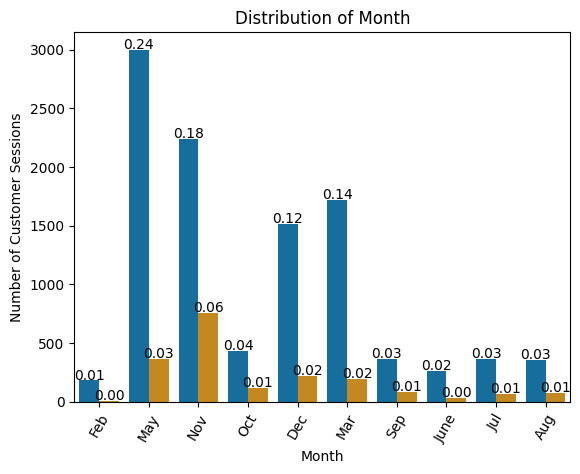

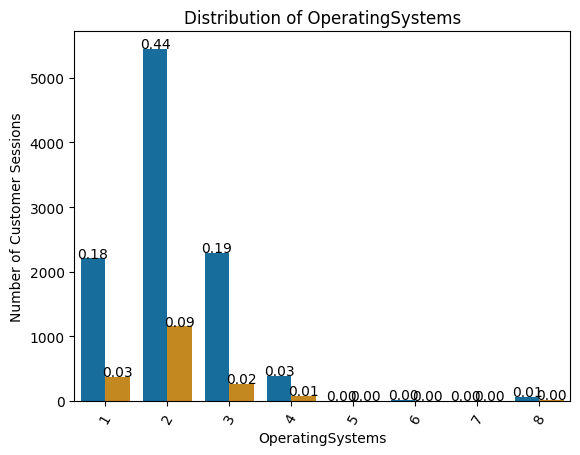

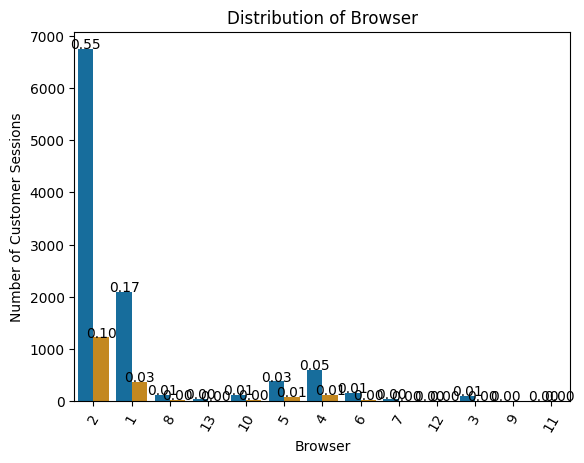

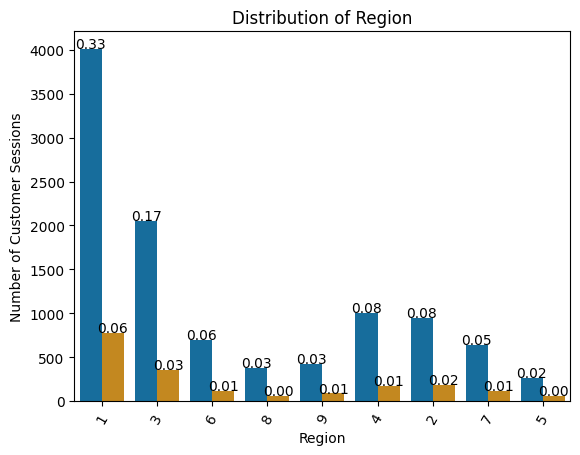

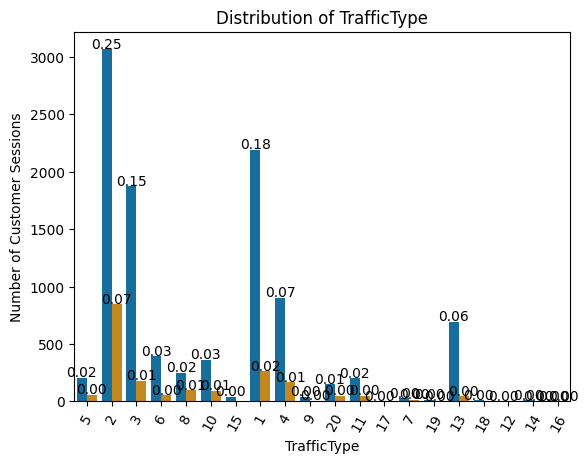

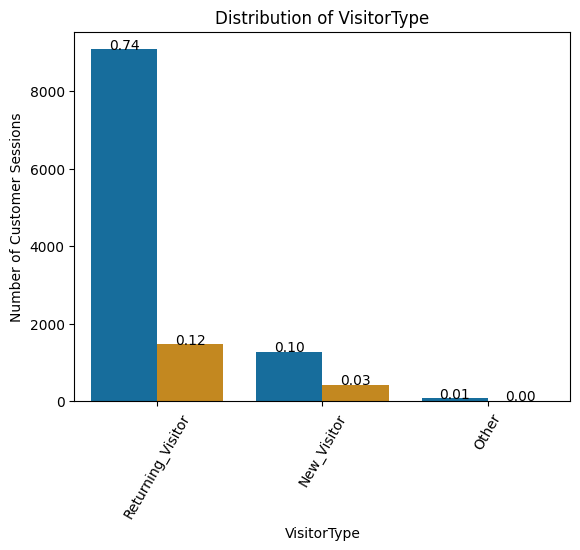

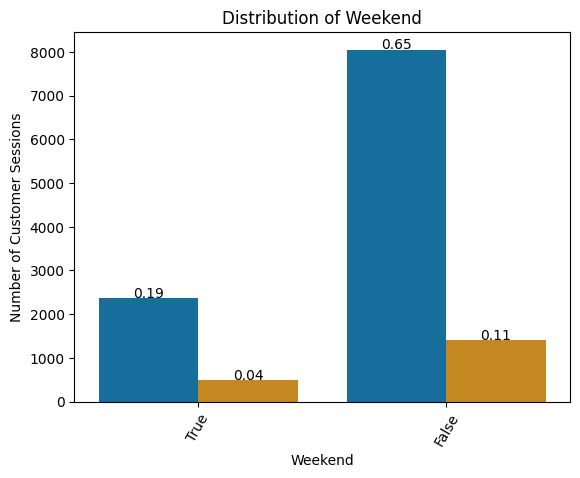

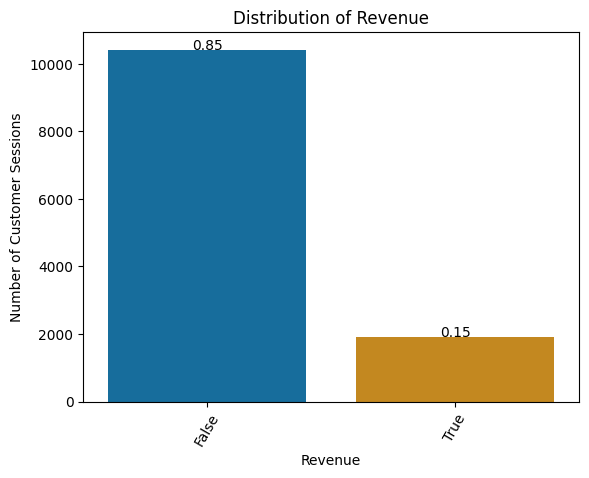

In [26]:
# Plot distributions of categorical variables.
for var in cat_df.columns:
    ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind', hue="Revenue", legend=False)
    total = float(len(online_df[var])) 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 10,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.title('Distribution of ' + str(var))
    plt.ylabel('Number of Customer Sessions')
    plt.xticks(rotation = 60)
    plt.show()

Most customers shop in the months of May and November and do most of their shopping during the week.  They use operating system 2, browser 2, and use traffic type 2.  They live in region 1 and are returning customers.  Most of the do not purchase anything and are on the website to shop. 

In [21]:
# Print value counts of categorical variables.
for var in cat_df.columns:
    print(online_df[var].value_counts())

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
17       1
12       1
Name: count, dtype: int64
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
Weekend
False    9462
True     2868
Na

In [22]:
# Split the numeric variables.
num_df = [f for f in online_df.columns if online_df.dtypes[f] != 'object']

# Create dataframe for numeric variables.
num_df = online_df[num_df]

In [23]:
num_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

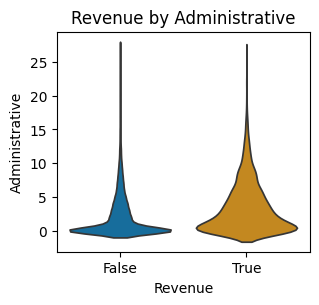

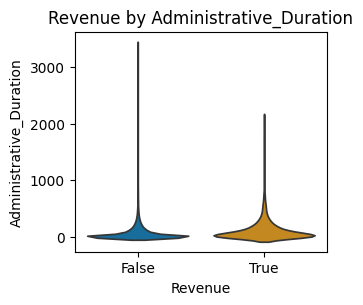

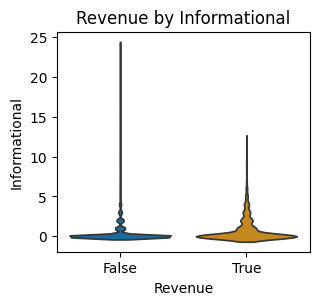

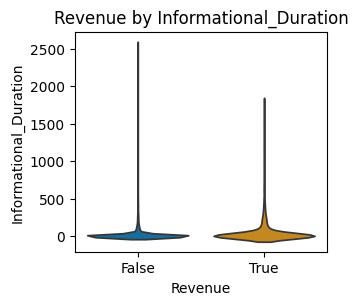

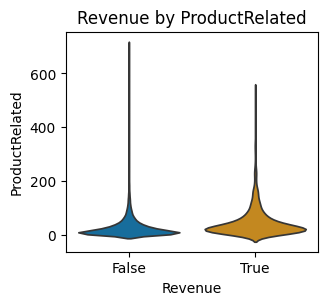

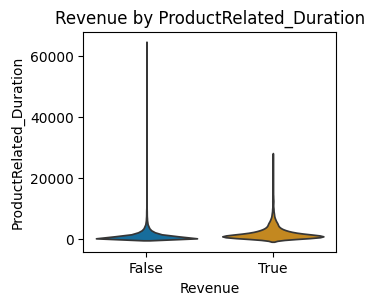

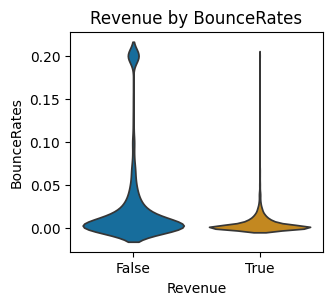

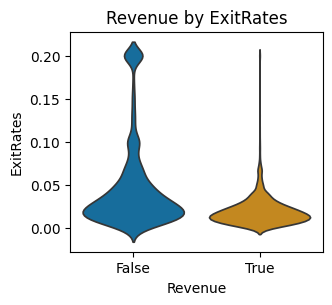

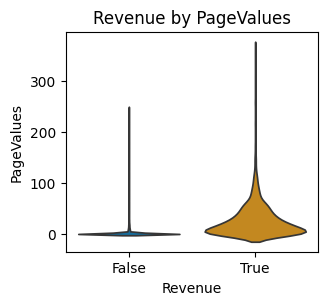

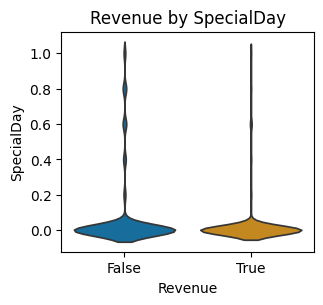

In [25]:
# Check the distributions of the numeric variables using violin plots.
num_all_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for i in range(len(num_all_columns)):
    plt.figure(figsize=(15, 20))
    plt.subplot(6, 4, i + 1)
    sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind', hue="Revenue", legend=False)
    plt.title('Revenue by {}'.format(num_all_columns[i]))
    plt.show()

Insights derived from the violin plots are the higher the number of pages visited the more customers will purchase something.  Another insight is customers who purchased an item have shorter exit rates and bounce rates than those customers that did not purchase an item.  One strategy to keep customers on the website longer is providing items they are interested in purchasing through a recommender system.      

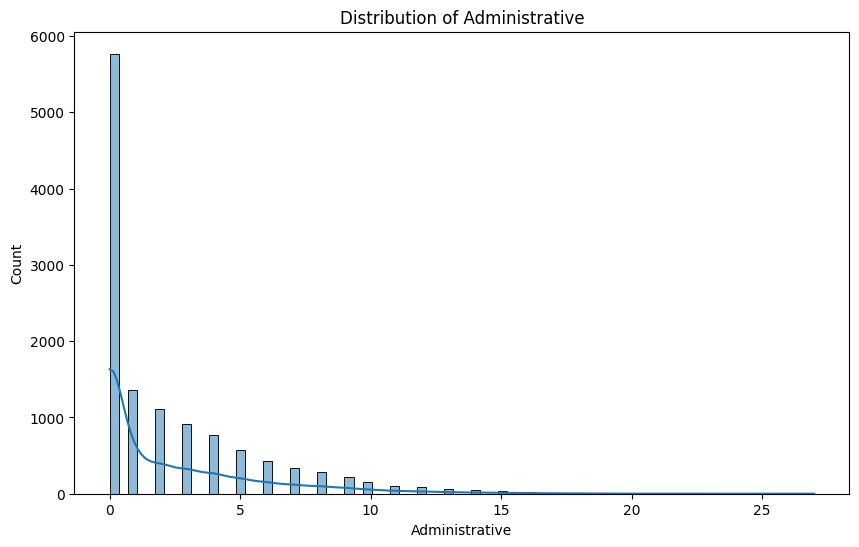

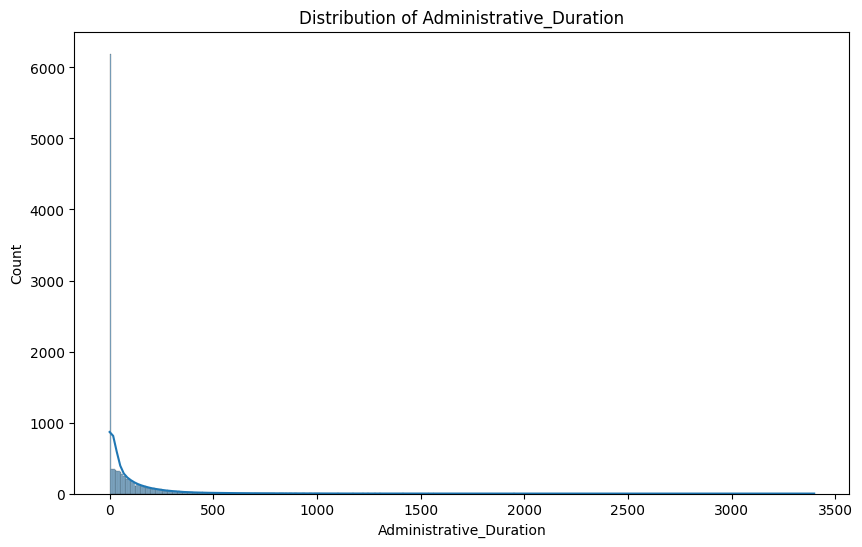

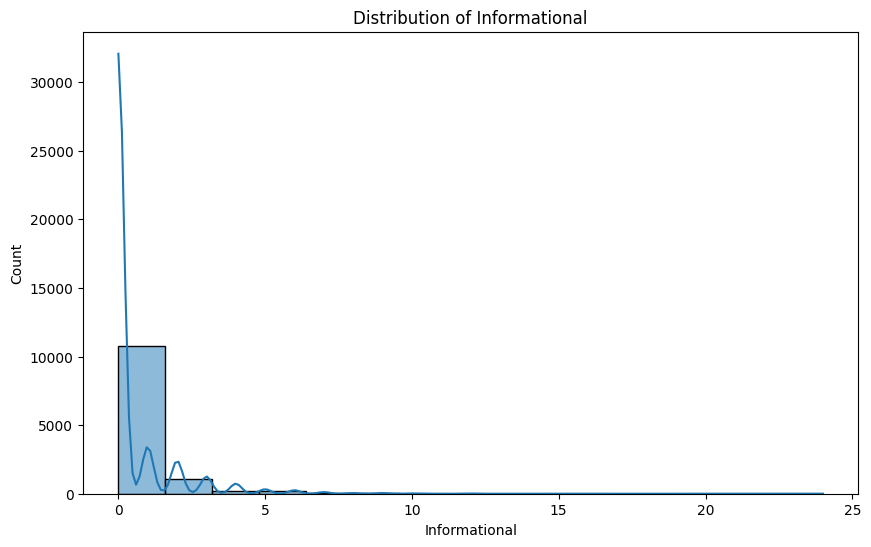

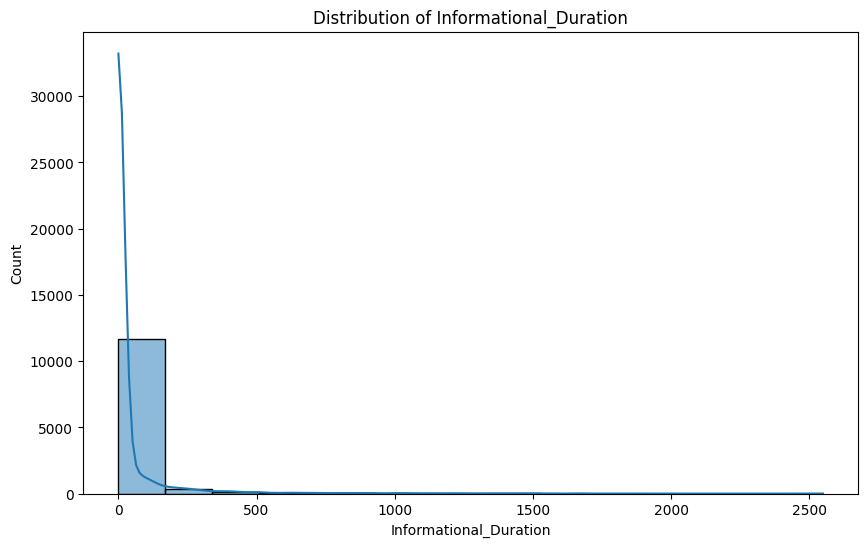

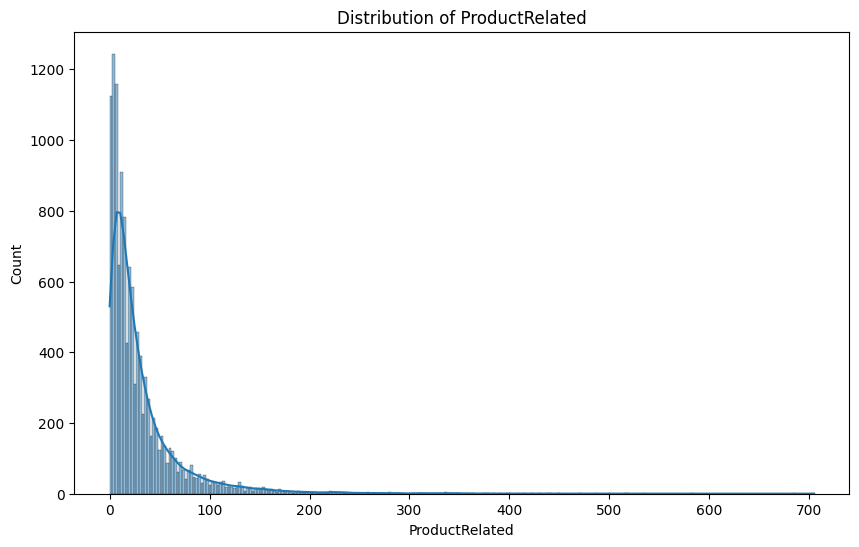

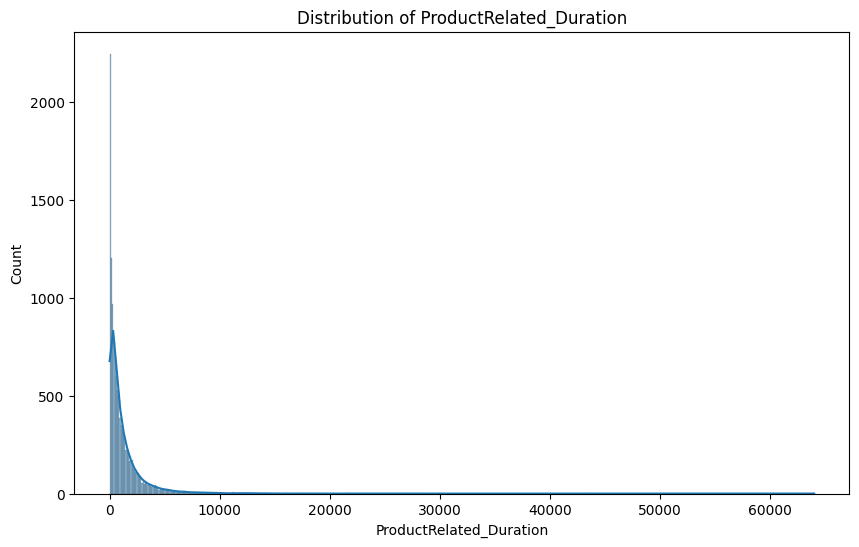

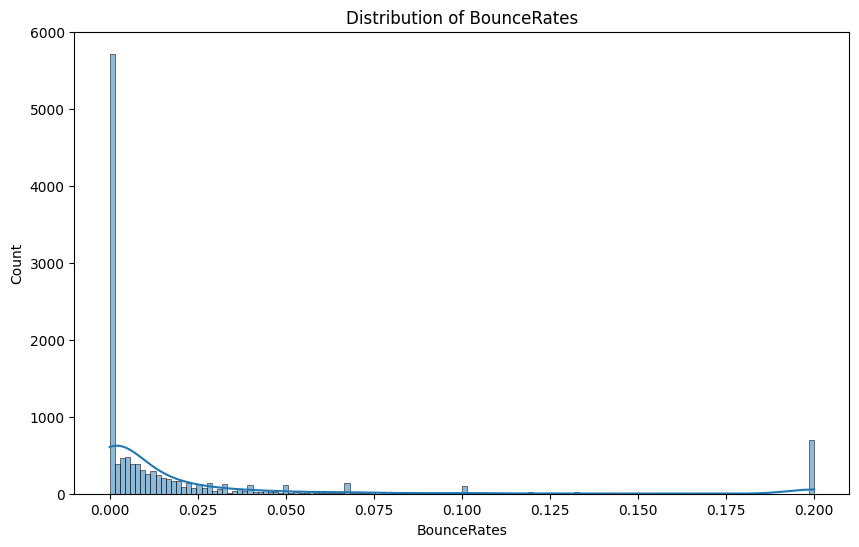

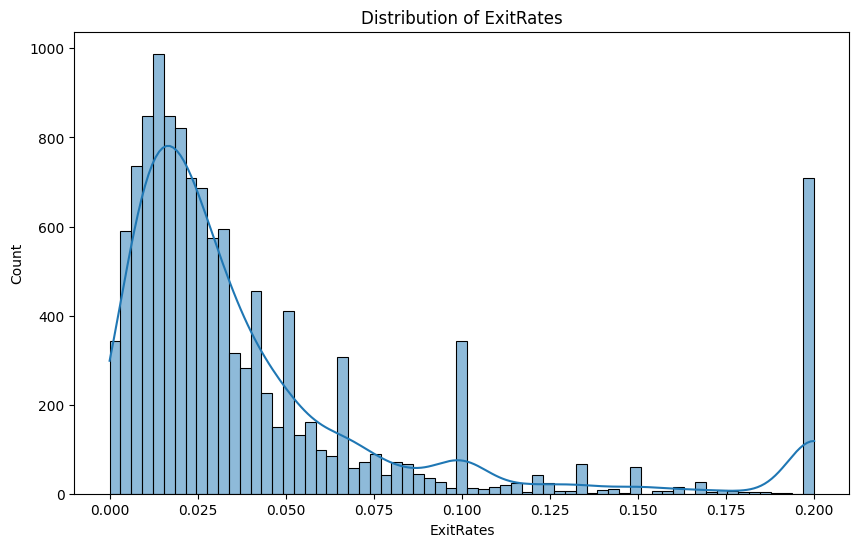

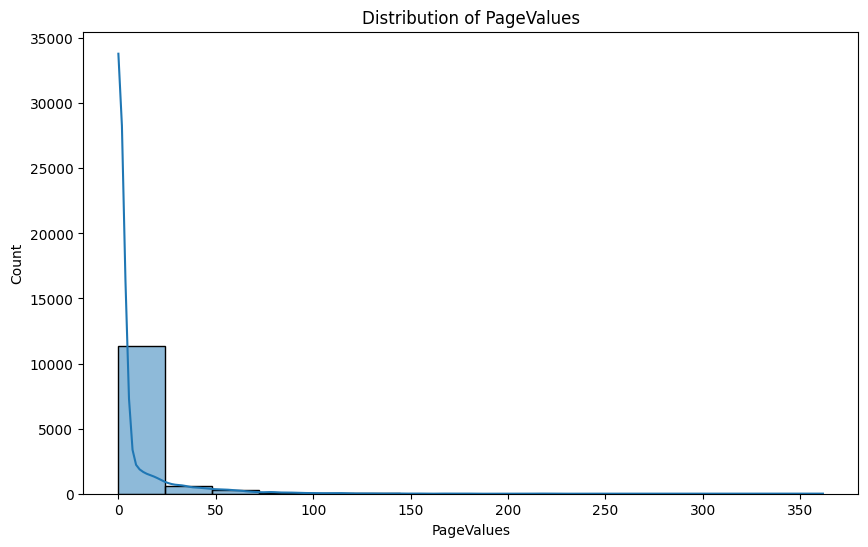

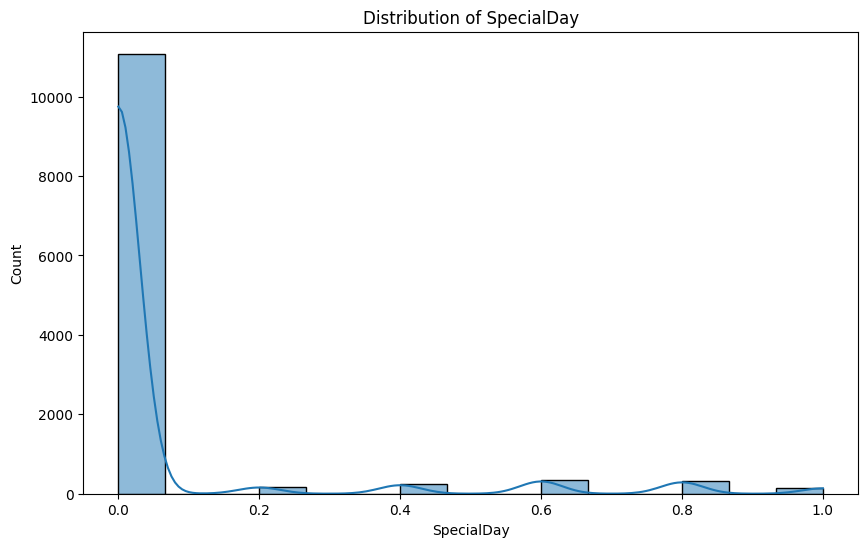

In [30]:
# Check the distributions of the numeric variables.
num_all_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
### old broken
"""
plt.figure(figsize=(15, 30))

for i in range(len(num_all_columns)):
    plt.subplot(6, 2, i + 1)
    sns.distplot(num_df[num_all_columns[i]])
    plt.title(num_all_columns[i])
"""
### END OLD BROKEN
for col in num_all_columns:
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Plot using histplot with KDE on the new figure
    sns.histplot(data=num_df, x=col, kde=True)
    
    # Set the title and labels for the current figure
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Display the current figure
    plt.show()


I can see many of the distributions are skewed right.  There are possible outliers that I will need to correct for with winsorization.  


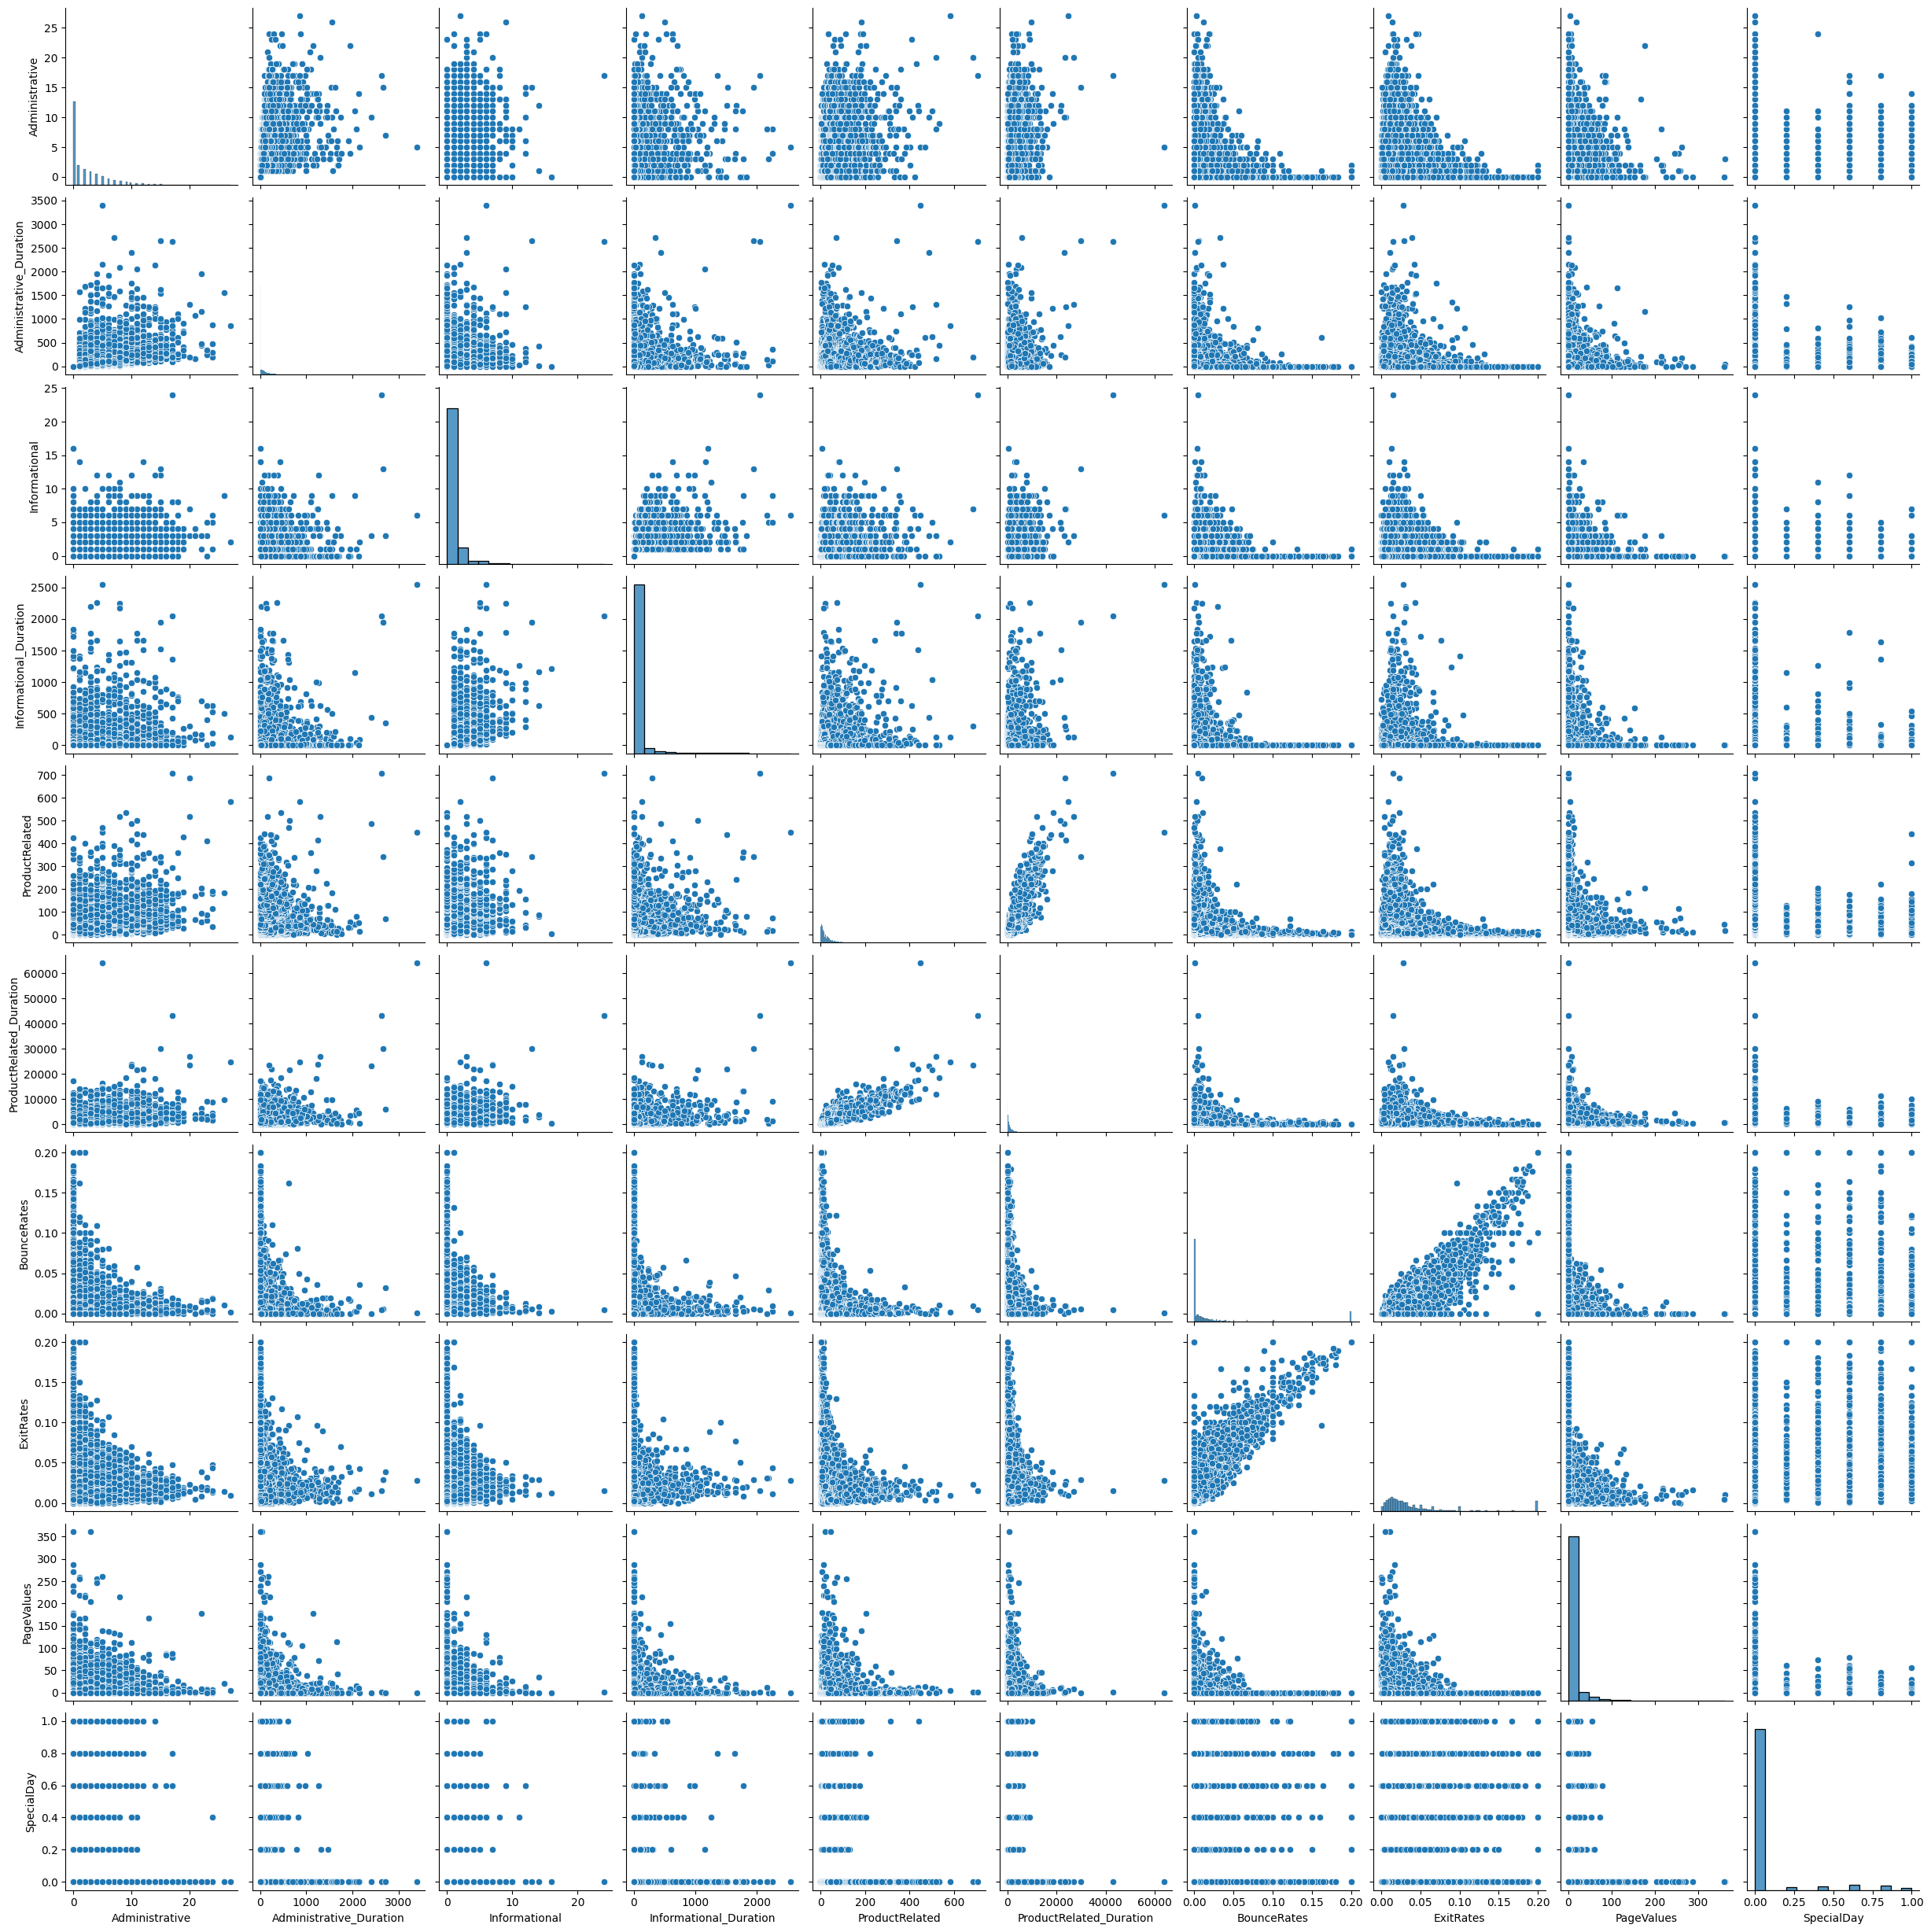

In [31]:
# Plot pairplots to check see the relationship between the numeric variables.
sns.pairplot(num_df)
plt.show()

I suspect there is multicollinearity based on the scatterplots.  I will verify this with a heatmap of the correlation matrix. 

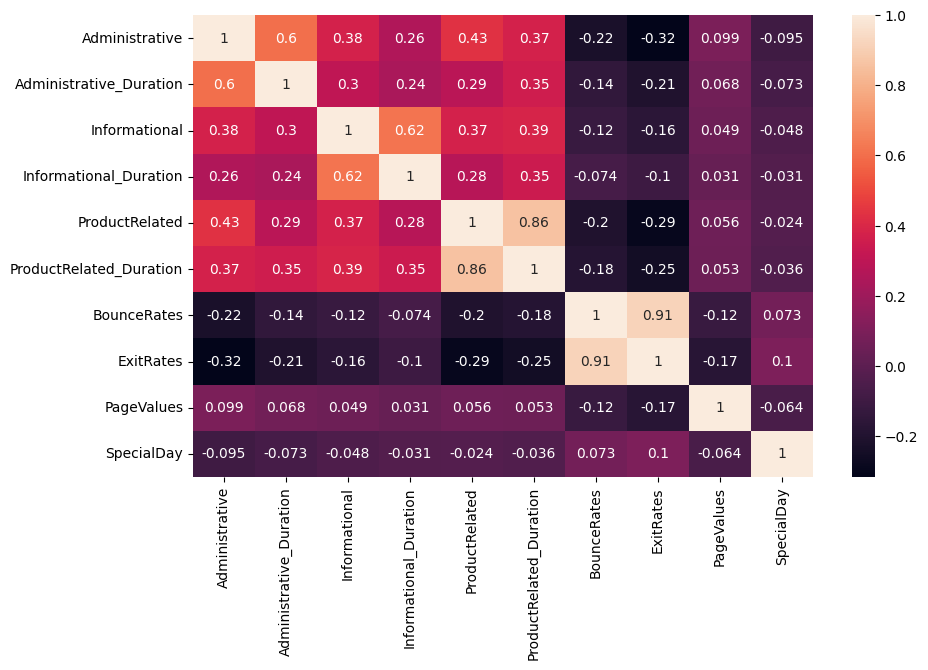

In [32]:
# Check for multicollinearity with a heatmap.
corr_matrix = round(num_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [34]:
# Drop columns because of high correlation to another variable.
new_num_df = num_df.drop(['ProductRelated', 'ExitRates'], axis=1)

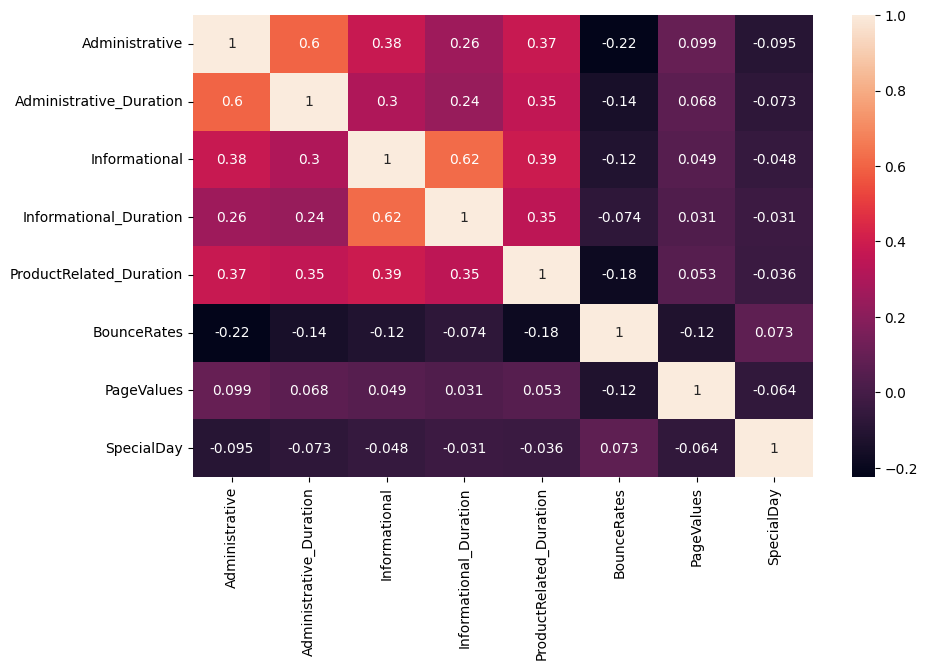

In [35]:
# Check for multicollinearity with a heatmap after dropping ProductRelated and ExitRates.
new_corr_matrix = round(new_num_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(new_corr_matrix, annot=True)
plt.show()

In [36]:
# Concatenate num_df and cat_df to form online_df.
online_df = pd.concat([new_num_df, cat_df], axis = 1)

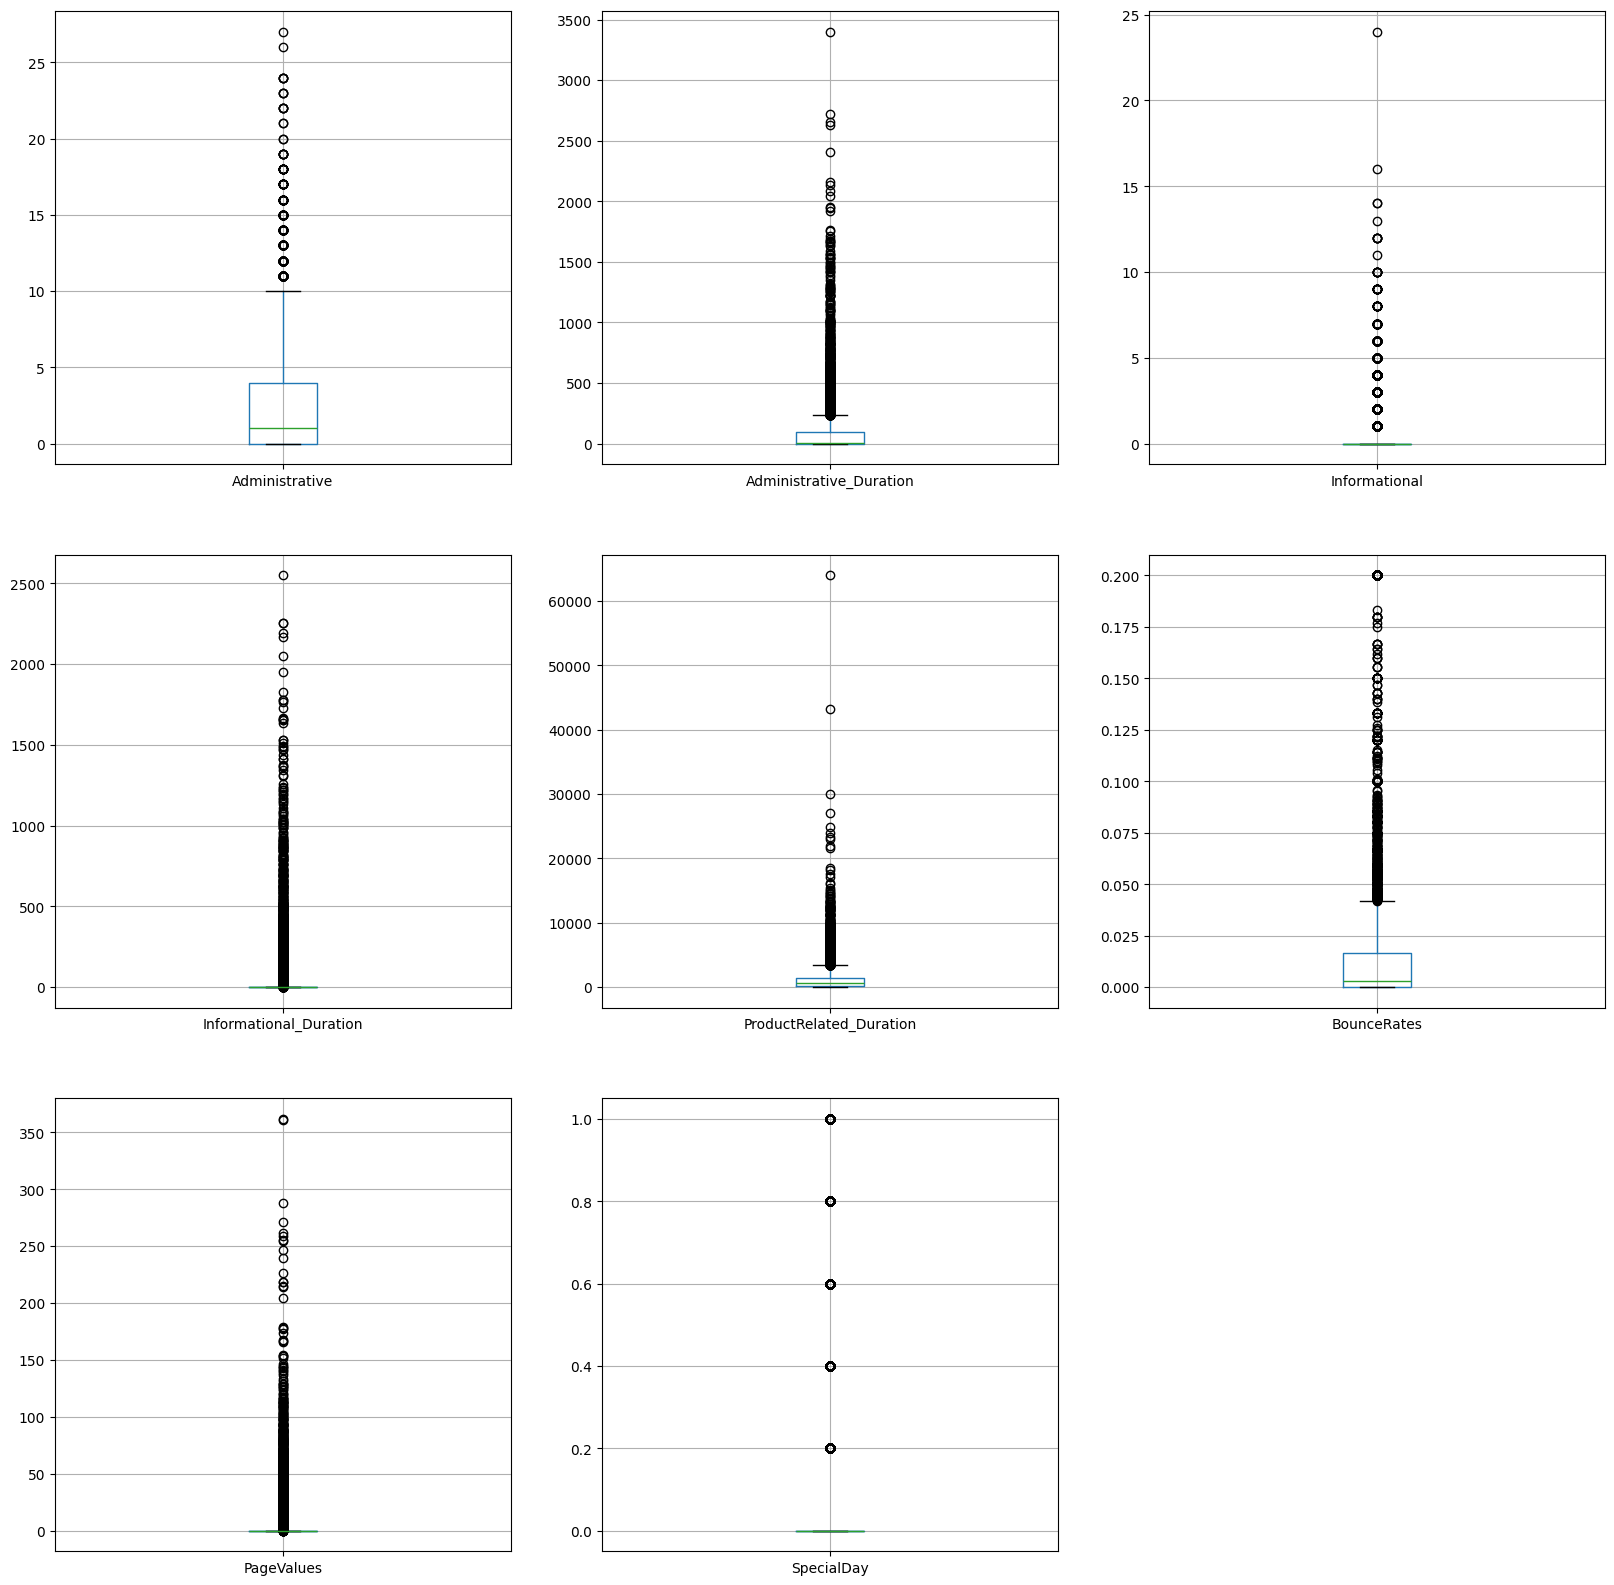

In [37]:
# Detect outliers through plotting box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    plt.subplot(3, 3, i)
    num_df.boxplot(col,whis=1.5)
    
plt.show()

In [38]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    q75, q25 = np.percentile(new_num_df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((new_num_df[col] > max_val) | 
                                                                                           (new_num_df[col] < min_val))[0])),
                                                                             len((np.where((new_num_df[col] > max_val) | 
                                                                                           (new_num_df[col] < min_val))[0]))*100/12330))

Number of outliers and percentage of it in Administrative : 404 and 3.276561232765612
Number of outliers and percentage of it in Administrative_Duration : 1172 and 9.505271695052716
Number of outliers and percentage of it in Informational : 2631 and 21.338199513381994
Number of outliers and percentage of it in Informational_Duration : 2405 and 19.505271695052716
Number of outliers and percentage of it in ProductRelated_Duration : 961 and 7.7939983779399835
Number of outliers and percentage of it in BounceRates : 1551 and 12.579075425790755
Number of outliers and percentage of it in PageValues : 2730 and 22.14111922141119
Number of outliers and percentage of it in SpecialDay : 1251 and 10.145985401459853


I can see all eight of the numeric variables have outliers.  I will correct for these outliers with StandardScaler in the preprocessing of data step.

# Data Pre-Processing

In [56]:
# Define X and y.
y = online_df['Revenue']
X = online_df.drop(['Revenue'], axis=1)

In [85]:
# Splitting the data into train (80%) and test (20%) data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2, stratify=y)

In [86]:
# Loading libraries for preprocessing data and creating pipelines.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [87]:
# Create pipelines to transform numeric and categorical variables.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 

In [88]:
# Split data into numeric and categorical variables.
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [89]:
# Apply transformations to the correct columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model Selection

In [90]:
# Load libraries
from pandas import set_option
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.neural_network import MLPClassifier

In [91]:
# Create a list classifiers to use pipeline in model selection.
classifiers = [
    LogisticRegression(),
    SVC(kernel='rbf', C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    MLPClassifier()
    ]

In [92]:
y_train = y_train.map({'True': 1, 'False': 0}).astype(int)
y_test = y_test.map({'True': 1, 'False': 0}).astype(int)

In [94]:
# Create a pipeline for the various classifiers to use for model selection.
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)
                            ])
    pipe.fit(X_train, y_train)
    print(classifier)
    print('Model score: %.3f' % pipe.score(X_test, y_test))

# Display classification report for all the models for model selection.    
    y_pred = pipe.predict(X_test)
    results = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: ')
    print(results)
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))

LogisticRegression()
Model score: 0.887
Confusion Matrix: 
[[2038   46]
 [ 232  150]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.77      0.39      0.52       382

    accuracy                           0.89      2466
   macro avg       0.83      0.69      0.73      2466
weighted avg       0.88      0.89      0.87      2466

SVC(C=0.025, probability=True)
Model score: 0.881
Confusion Matrix: 
[[2056   28]
 [ 265  117]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2084
           1       0.81      0.31      0.44       382

    accuracy                           0.88      2466
   macro avg       0.85      0.65      0.69      2466
weighted avg       0.87      0.88      0.86      2466

DecisionTreeClassifier()
Model score: 0.851
Confusion Matrix: 
[[1899  185]
 [ 183  199]]
Classification Report: 
  

C:\Users\richa\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Since I am predicting a true or false value for revenue, I considered several classification machine learning models.  The following models I considered were Logistic Regression, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Extreme Gradient Boosting Classifier, Light Gradient Boosting Machine Classifier, and Multi-layer Perceptron Classifier.  I used a machine learning pipeline from scikit learn to display the confusion, accuracy, and classification report for each classifier.  In selecting the model, I used the F1 measure because it is a harmonic mean between precision and recall.  F1 measure accounts for an imbalance in classes of the target variable.  Through this process, I noticed Gradient Boosting Classifier algorithm performed better than all the others with 0.81 macro average. 

# Evaluating Gradient Boosting Classifier.

In [95]:
# Create a pipeline for the various classifiers to use for model selection.
gb_clf = GradientBoostingClassifier()
pipe_gb = Pipeline(steps=[('preprocessor', preprocessor),
                       ('gb_clf', GradientBoostingClassifier())
                      ])
pipe_gb.fit(X_train, y_train)
print(gb_clf)
print('Model score: %.3f' % pipe_gb.score(X_test, y_test))

# Display classification report for all the models for model selection.    
y_pred_gb = pipe_gb.predict(X_test)
results_gb = confusion_matrix(y_test, y_pred_gb)
print('Confusion Matrix: ')
print(results_gb)
print('Classification Report: ')
print(classification_report(y_test, y_pred_gb))

GradientBoostingClassifier()
Model score: 0.897
Confusion Matrix: 
[[1992   92]
 [ 161  221]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2084
           1       0.71      0.58      0.64       382

    accuracy                           0.90      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [127]:
### Used in testing later to send to the API endpoint hosted in Flask

import pandas as pd
import json

# --- 1. Extract a single random sample ---
sample_record = X_train.sample(n=1, random_state=42)

# --- 2. Correctly rename columns to match the API payload ---
# The rename_map should go from the model's names to the API's input names.
api_rename_map = {
    'TrafficType': 'input_TrafficType',
    'VisitorType': 'input_VistorType',  # Note: This is your API's typo'd key
    'Weekend': 'input_Weekend'
}

# Rename the columns of the sample record
sample_record_renamed = sample_record.rename(columns=api_rename_map)

# --- 3. Convert to JSON string ---
sample_json_dict = sample_record_renamed.to_dict(orient='records')[0]

# --- 4. Print the result for easy copy/paste ---
print("This is the Python dictionary:")
print(sample_json_dict)
print("\n" + "-"*50 + "\n")
print("Copy this JSON string for your curl or requests test:")
print(json.dumps(sample_json_dict, indent=4))

This is the Python dictionary:
{'Administrative': 0, 'Administrative_Duration': 0.0, 'Informational': 0, 'Informational_Duration': 0.0, 'ProductRelated_Duration': 24.0, 'BounceRates': 0.042857143, 'PageValues': 0.0, 'SpecialDay': 0.8, 'Month': 'May', 'OperatingSystems': '2', 'Browser': '4', 'Region': '1', 'input_TrafficType': '3', 'input_VistorType': 'Returning_Visitor', 'input_Weekend': 'False'}

--------------------------------------------------

Copy this JSON string for your curl or requests test:
{
    "Administrative": 0,
    "Administrative_Duration": 0.0,
    "Informational": 0,
    "Informational_Duration": 0.0,
    "ProductRelated_Duration": 24.0,
    "BounceRates": 0.042857143,
    "PageValues": 0.0,
    "SpecialDay": 0.8,
    "Month": "May",
    "OperatingSystems": "2",
    "Browser": "4",
    "Region": "1",
    "input_TrafficType": "3",
    "input_VistorType": "Returning_Visitor",
    "input_Weekend": "False"
}


# Important Features

In [96]:
num_df = X_train.select_dtypes(include=['int64', 'float64'])
cat_df = X_train.select_dtypes(include=['object'])

In [97]:
# Encode categorical variables.
dum_cat_df = pd.get_dummies(cat_df)

In [98]:
# Normalize numerical variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_num_df = scaler.fit_transform(num_df)
num_df = pd.DataFrame(scaled_num_df, columns=num_df.columns)

In [99]:
# Concatenate num_df and cat_df to create X_train
X_train_transform = pd.concat([num_df.reset_index(drop=True), dum_cat_df.reset_index(drop=True)], axis=1)

In [100]:
# Encode target variable.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode_y_train = le.fit_transform(y_train)
y_train_transform = pd.DataFrame(encode_y_train)

In [103]:
# Balance the classes of the dataset.
from imblearn.over_sampling import SMOTE
# Fit SMOTE().
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=100)
X_train_res, y_train_res = sm.fit_resample(X_train_transform, y_train_transform)

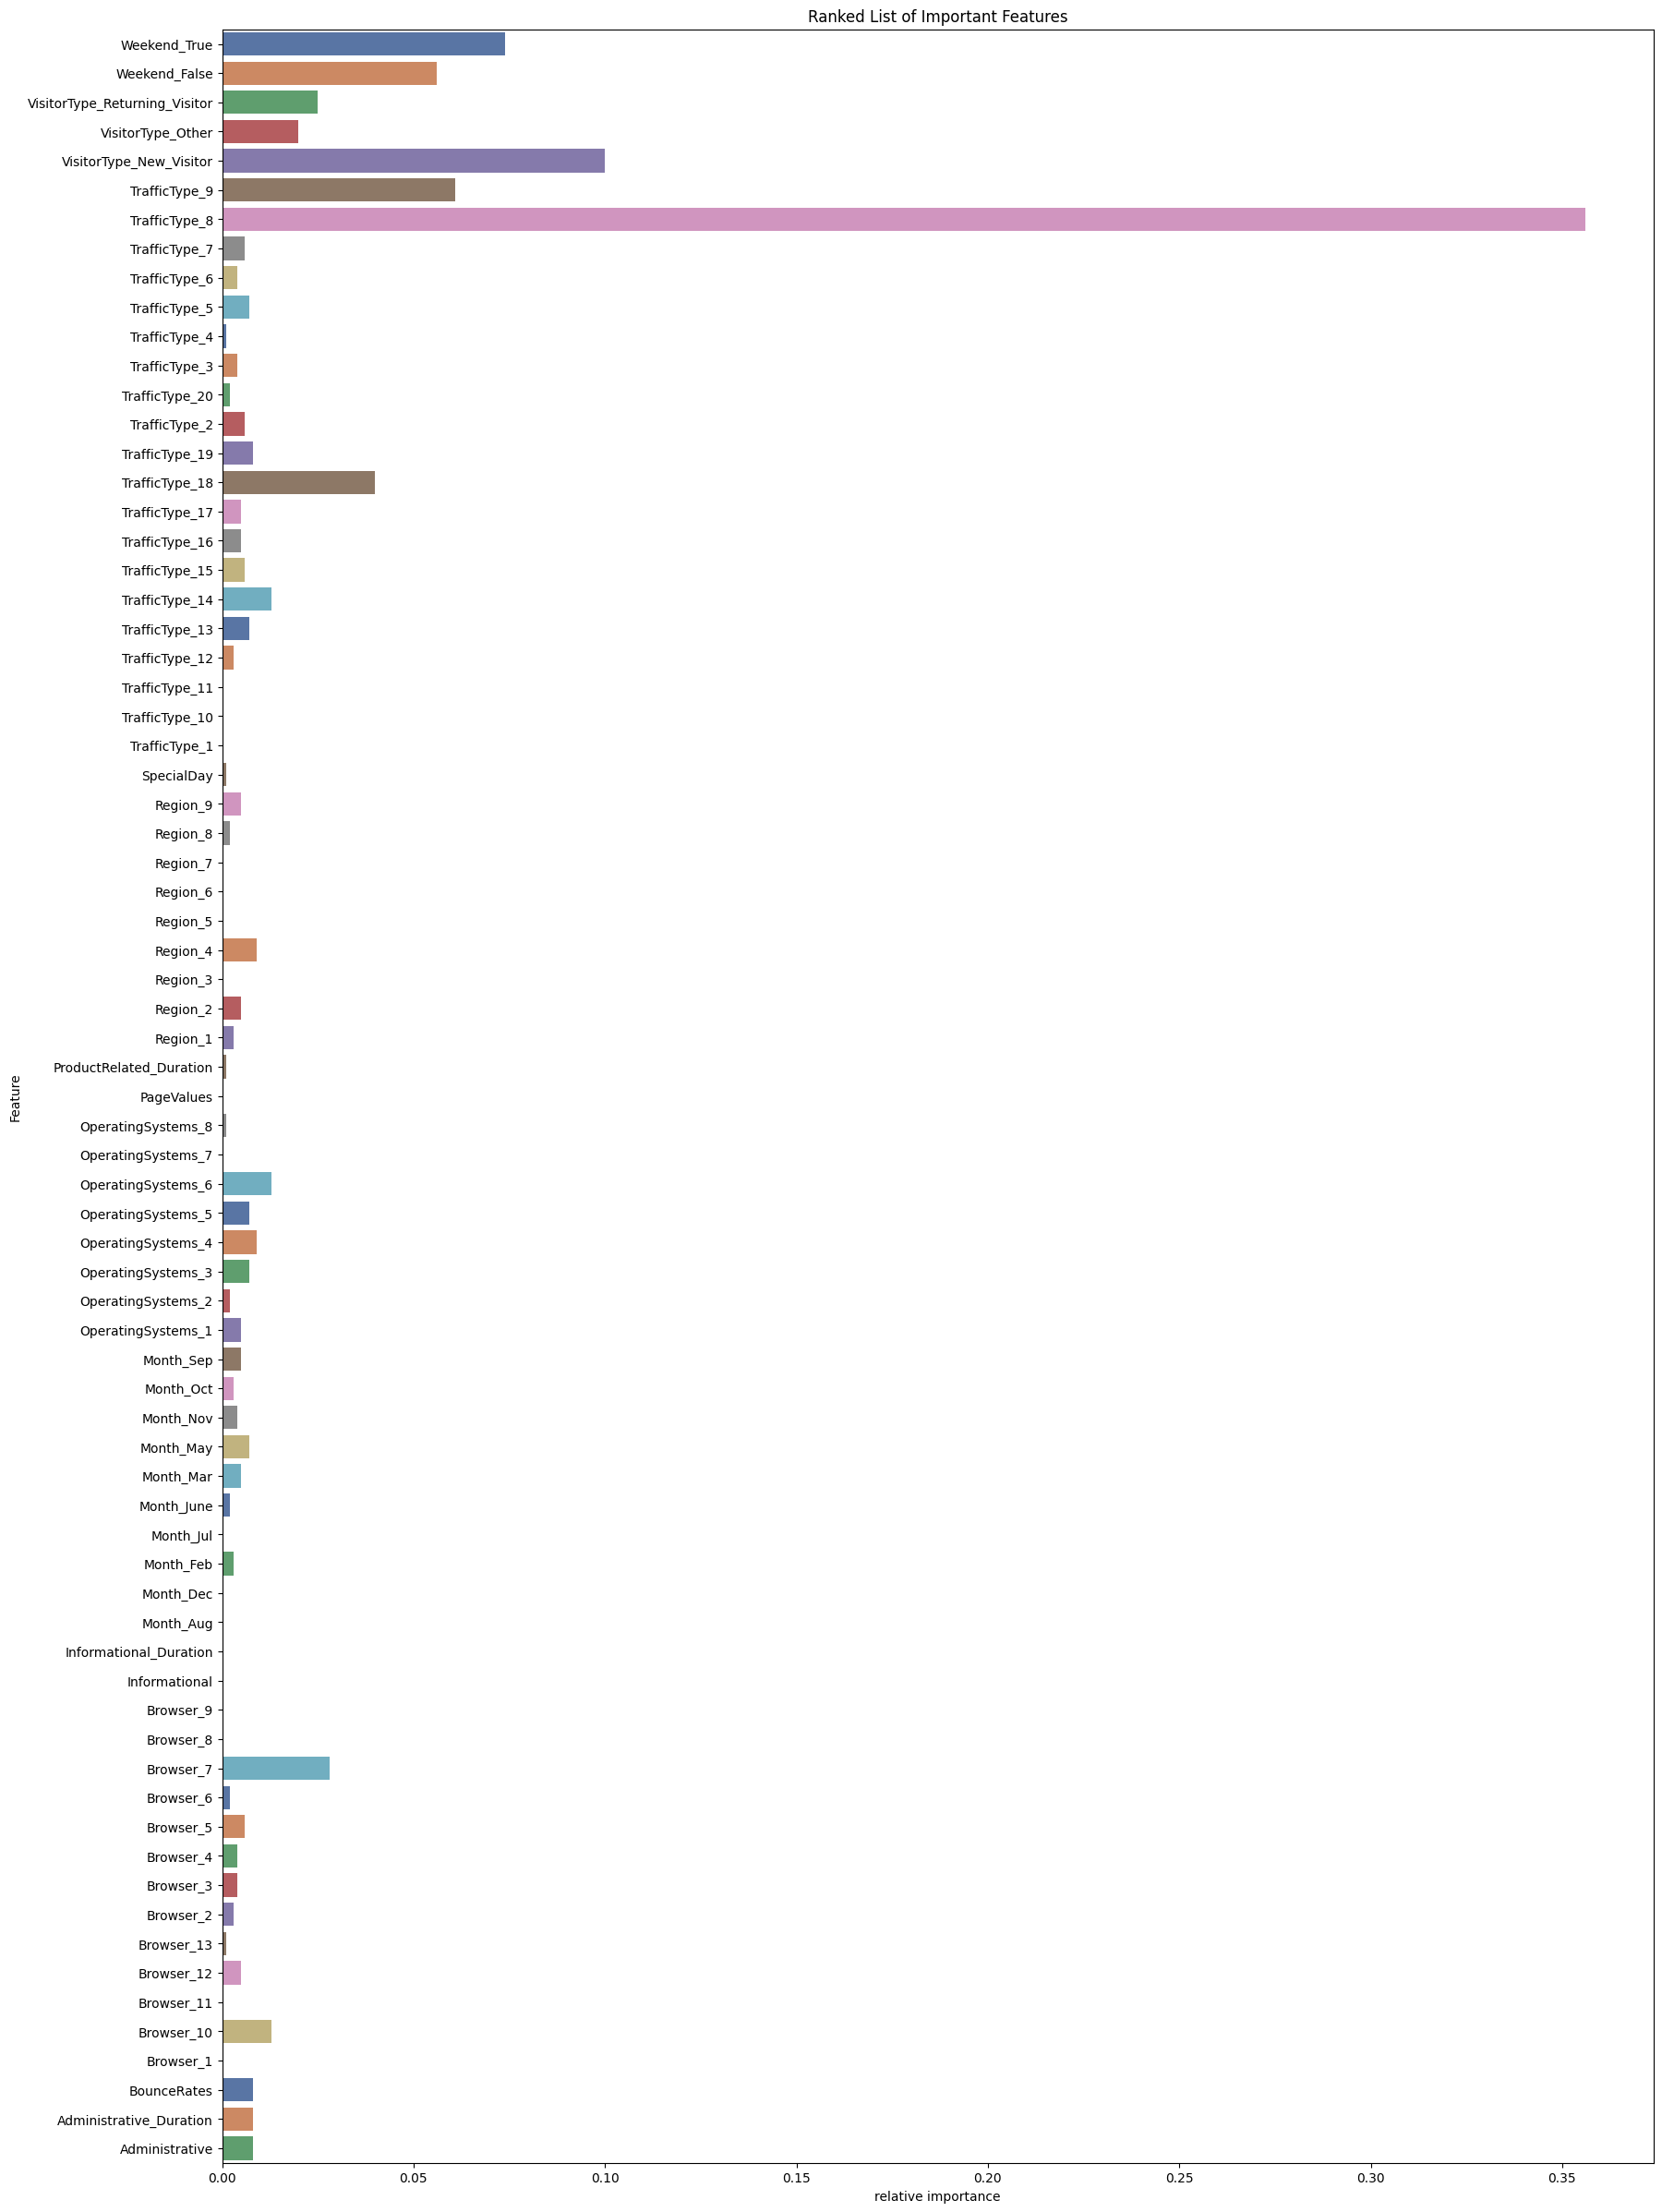

In [106]:
# List the importantance of the features ranked from the random forest classifier. 
# Initialize the model.
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res.values.ravel())

feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X_train_res.columns.sort_values(ascending = False))

# Create a DataFrame for Seaborn
plot_df = ser_rank.reset_index()
plot_df.columns = ['Feature', 'Importance']

plt.figure(figsize=(20, 30))
# Assign 'y' to 'hue' for the colors and set 'legend=False'
sns.barplot(x='Importance', y='Feature', data=plot_df, palette='deep', hue='Feature', legend=False)
plt.title('Ranked List of Important Features')
plt.xlabel('relative importance')
plt.show()

In [107]:
# List the top 16 features based on relative importance.
imp_features = ser_rank.sort_values(ascending=False)
imp_features[:20]

TrafficType_8                    0.356
VisitorType_New_Visitor          0.100
Weekend_True                     0.074
TrafficType_9                    0.061
Weekend_False                    0.056
TrafficType_18                   0.040
Browser_7                        0.028
VisitorType_Returning_Visitor    0.025
VisitorType_Other                0.020
TrafficType_14                   0.013
Browser_10                       0.013
OperatingSystems_6               0.013
OperatingSystems_4               0.009
Region_4                         0.009
Administrative_Duration          0.008
BounceRates                      0.008
Administrative                   0.008
TrafficType_19                   0.008
TrafficType_13                   0.007
TrafficType_5                    0.007
dtype: float64

# Ecommerce Dashboard

## Basic KPI

In [160]:
### SQL for fetching dashboard data

# Total Orders
sql_total_orders = """
SELECT COUNT(DISTINCT "OrderID") AS total_orders
FROM "Dim_Order";
"""

# Total Revenue
sql_total_revenue = """
SELECT SUM("PaymentValue") AS total_revenue
FROM "Dim_Payment";
"""

# Average Installments
sql_avg_installments = """
SELECT AVG("PaymentInstallments") AS avg_installments
FROM "Dim_Payment"
WHERE "PaymentInstallments" > 0;
"""

# Total Payments
sql_total_payments = """
SELECT COUNT(DISTINCT "OrderID") AS total_payments
FROM "Dim_Payment";
"""

# Delayed Orders
sql_delayed_orders="""
SELECT COUNT(DISTINCT "OrderID") AS delayed_orders
FROM "Dim_Order"
WHERE "DeliveredDate" > "EstimatedTimeDelivery";
"""

## Midlevel KPIs

In [135]:
import psycopg2
from psycopg2.extras import execute_values
from datetime import datetime

MYSQL_HOST = "34.174.136.84"
MYSQL_PORT = 5432
MYSQL_DB_NAME = "airflow" 
MYSQL_USERNAME = "airflow"
MYSQL_PASSWORD = "airflow"

db_params= {
    'host':MYSQL_HOST,
    'port':MYSQL_PORT,
    'user':MYSQL_USERNAME,
    'password':MYSQL_PASSWORD,
    'database':MYSQL_DB_NAME
}

In [162]:
# Function to execute a single query and return the result
def fetch_single_value(query):
    conn = None    
    schema_name = 'dwh'
    search_path_string = f'-c search_path={schema_name},public'    
    try:
        # Pass the corrected search_path string to the connection
        conn = psycopg2.connect(**db_params, options=search_path_string)
        cursor = conn.cursor()
        cursor.execute(query)
        result = cursor.fetchone()[0]
        return result
    except (Exception, psycopg2.Error) as error:
        print(f"Error while connecting to PostgreSQL or executing query: {error}")
        return None
    finally:
        if conn:
            cursor.close()
            conn.close()

In [163]:
def fetch_data_frame(query):
    conn = None    
    schema_name = 'dwh'    
    search_path_string = f'-c search_path={schema_name},public'
    
    try:
        # Establish connection with the search_path set
        conn = psycopg2.connect(**db_params, options=search_path_string)
        
        # Use pandas.read_sql for convenience
        df = pd.read_sql(query, conn)
        return df
    except (Exception, psycopg2.Error) as error:
        print(f"Error while connecting to PostgreSQL or executing query: {error}")
        return pd.DataFrame()  # Return an empty DataFrame on error
    finally:
        if conn:
            conn.close()

# Example usage:
# df_example = fetch_data_frame("SELECT * FROM \"YourTableName\" LIMIT 10;")
# print(df_example.head(

In [164]:
# Execute each query to get the KPI values
total_orders = fetch_single_value(sql_total_orders)
total_revenue = fetch_single_value(sql_total_revenue)
avg_installments = fetch_single_value(sql_avg_installments)
total_payments = fetch_single_value(sql_total_payments)
delayed_orders = fetch_single_value(sql_delayed_orders)

In [159]:
print(delayed_orders);

42


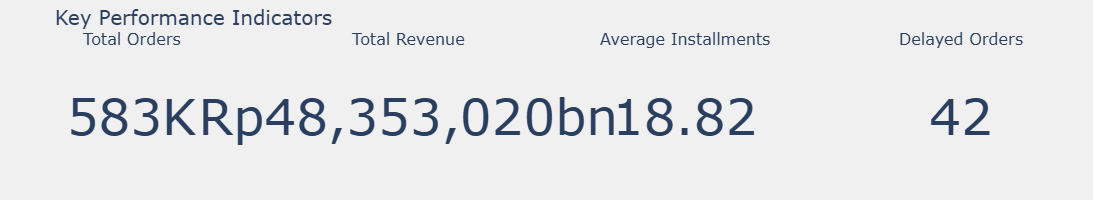

In [165]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure with subplots for each KPI
fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}]],
    subplot_titles=('Total Orders', 'Total Revenue', 'Average Installments', 'Delayed Orders')
)

# Add traces for each KPI
fig.add_trace(go.Indicator(
    mode="number",
    value=total_orders,
    number={'valueformat': ',.0f', 'suffix': 'K', 'font': {'size': 50}},
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_revenue,
    number={'valueformat': ',.0f', 'suffix': 'bn', 'prefix': 'Rp', 'font': {'size': 50}},
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=avg_installments,
    number={'valueformat': '.2f', 'font': {'size': 50}},
), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="number",
    value=delayed_orders,
    number={'valueformat': ',', 'font': {'size': 50}},
), row=1, col=4)

# Update layout for styling
fig.update_layout(
    height=200,
    showlegend=False,
    title_text="Key Performance Indicators",
    title_font_size=20,
    margin={'t': 50, 'b': 20, 'l': 20, 'r': 20},
    paper_bgcolor='#f0f0f0',
    plot_bgcolor='#f0f0f0'
)

fig.show()

In [167]:
import panel as pn
import pandas as pd
import plotly.graph_objects as go

# Ensure panel is configured for plotly
pn.extension('plotly')

# Assume you have these values from your queries
total_orders = 99440
total_revenue = 16000000000
avg_installments = 2.93
delayed_orders = 6535

# Create a small utility function to generate a KPI card
def create_kpi_card(title, value, unit="", color="black"):
    return pn.Column(
        f"## {title}",
        f"### **<span style='color:{color}'>{value} {unit}</span>**",
        width=200, height=100,
        styles={'border': '1px solid lightgray', 'padding': '10px', 'border-radius': '5px'}
    )

# Create a row of KPI cards
kpi_row = pn.Row(
    create_kpi_card("Total Orders", f"{total_orders/1000:.2f}K"),
    create_kpi_card("Total Revenue", f"Rp{total_revenue/1e9:.1f}bn"),
    create_kpi_card("Average Installments", f"{avg_installments:.2f}"),
    create_kpi_card("Delayed Orders", f"{delayed_orders:,}")
)

# You would add your Plotly figures here, for example:
# orders_by_category_plot = go.Figure(...)

# Then you can create the main dashboard layout
# dashboard_layout = pn.Column(
#     kpi_row,
#     pn.Row(orders_by_category_plot, payments_by_type_plot),
#     pn.Row(orders_by_time_plot, feedback_plot)
# )

# The final dashboard object
dashboard = pn.Column(
    pn.pane.Markdown("# E-Commerce Dashboard"),
    pn.pane.Markdown("#### Data Engineering Mentorship 2023"),
    pn.Spacer(height=20),
    kpi_row,
    # The rest of your charts would go here
)

# To display in a notebook
dashboard

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Spacer(height=20)
    [3] Row
        [0] Column(height=100, sizing_mode='fixed', styles={'border': '1px solid ligh...}, width=200)
            [0] Markdown(str)
            [1] Markdown(str)
        [1] Column(height=100, sizing_mode='fixed', styles={'border': '1px solid ligh...}, width=200)
            [0] Markdown(str)
            [1] Markdown(str)
        [2] Column(height=100, sizing_mode='fixed', styles={'border': '1px solid ligh...}, width=200)
            [0] Markdown(str)
            [1] Markdown(str)
        [3] Column(height=100, sizing_mode='fixed', styles={'border': '1px solid ligh...}, width=200)
            [0] Markdown(str)
            [1] Markdown(str)

# Creating a Simple Flask Application

In [116]:
# Saving the trained model.
import os
if not os.path.exists('model'):
    os.makedirs('model')

import joblib
joblib.dump(pipe_gb, './model/gbc_model')

['./model/gbc_model']

In [114]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\data\projects\mandy\signals


In [129]:
# Create a simple flask app.
from flask import Flask, request
from flask_restful import Resource, Api
import joblib

app = Flask(__name__)
api = Api(app)

class Test_index(Resource):
    def post(self):
        loaded_model = joblib.load('gbc_model')
        test_data = request.get_json()
        input_df = pd.DataFrame([test_data])
        input_df.rename(columns=
                       {'input_TrafficType':'TrafficType', 'input_VisitorType':'VisitorType', 'input_Weekend':'Weekend'}, inplace=True)
        
        feature_names = loaded_model.feature_names_in_
        print("Expected feature names (including one-hot encoded):", feature_names)

        print(input_df)
        print("Input DataFrame dtypes:\n", input_df.dtypes)
        y_train_predict = loaded_model.predict(input_df)
        test_output = pd.DataFrame(y_train_predict, columns=['output'])
        output = test_output.to_dict(orient='list')
        return output

api.add_resource(Test_index, '/test')
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)
    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [01/Sep/2025 19:51:49] "POST /test HTTP/1.1" 200 -


Expected feature names (including one-hot encoded): ['Administrative' 'Administrative_Duration' 'Informational'
 'Informational_Duration' 'ProductRelated_Duration' 'BounceRates'
 'PageValues' 'SpecialDay' 'Month' 'OperatingSystems' 'Browser' 'Region'
 'TrafficType' 'VisitorType' 'Weekend']
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   

   Informational_Duration  ProductRelated_Duration  BounceRates  PageValues  \
0                     0.0                     24.0     0.042857         0.0   

   SpecialDay Month OperatingSystems Browser Region TrafficType  \
0         0.8   May                2       4      1           3   

         VisitorType Weekend  
0  Returning_Visitor   False  
Input DataFrame dtypes:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated_Duration    float64
BounceRates                flo